# Interacting particles in a box

In [1]:
import CairoMakie as cm

include("../src/verlet.jl")

calc_lj_hamiltonian (generic function with 1 method)

In [2]:
dt = 0.000_1
cutoff = 2.5
box_size = 20.0
pos_arr = verlet_simulate(N_particles=50, steps=100_000,L=box_size, dt=dt,cutoff=cutoff)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:080


100001×50×3 Array{Float64, 3}:
[:, :, 1] =
 18.0341  17.9453  14.0133  18.5531  …  15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531  …  15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0341  17.9453  14.0133  18.5531     15.0413  11.7863  6.82305  1.29728
  ⋮                                  ⋱                             
 18.0661  17.9453  13.9447  18.5531     15.0413  11.7863  6.82305  1.29728
 18.0661  17.9453  13.9447  18.5531     15.0413  11.7863  6.8230

In [3]:
v = sb.mean(calc_mean_velocity(pos_arr, dt=dt),dims=3)
v = reshape(v,length(v))
t = collect(range(0,length(v)*dt,length(v)));

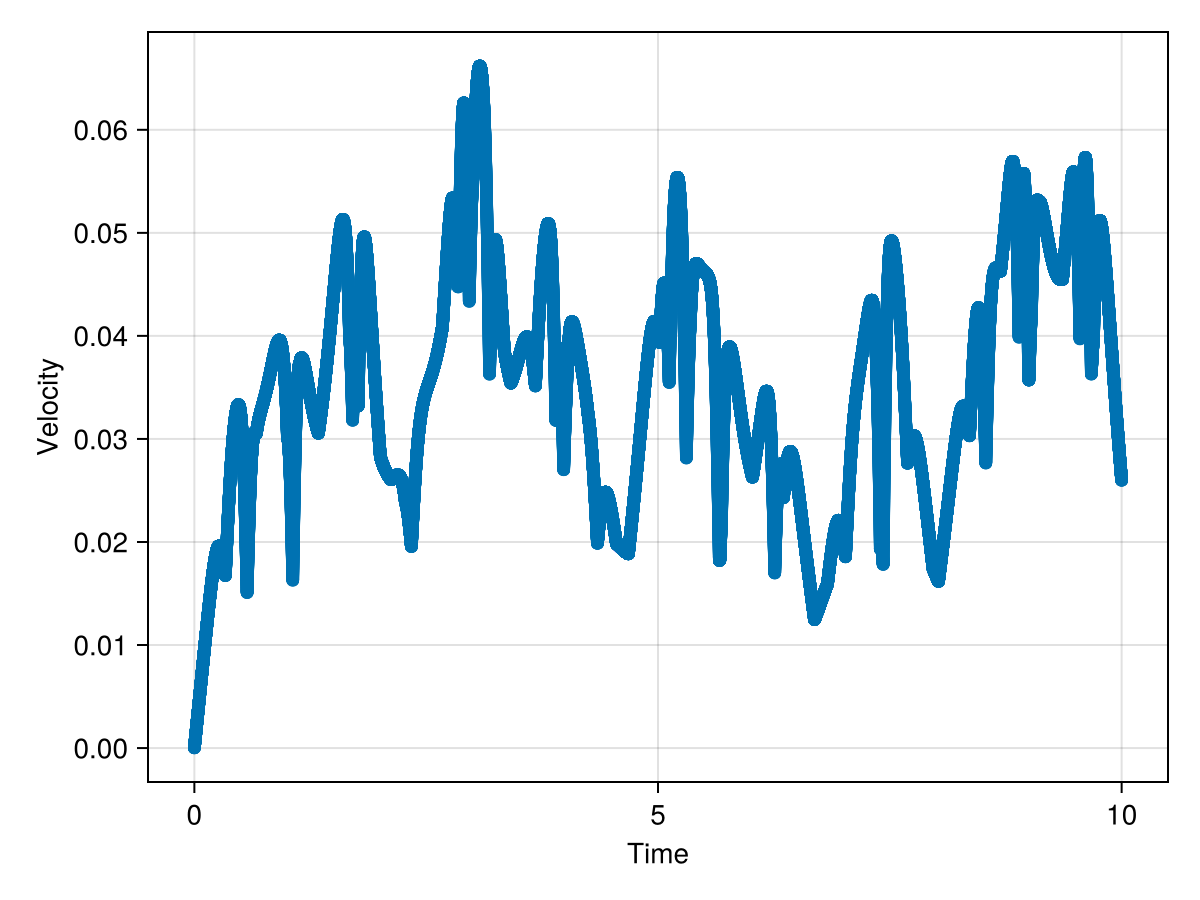

In [4]:
fig = cm.Figure()
ax = cm.Axis(fig[1, 1], xlabel="Time", ylabel="Velocity")
cm.plot!(ax, t, v)

fig

In [5]:
energy = calc_lj_hamiltonian(pos_arr, dt=dt, cutoff=cutoff,L=box_size)
t = collect(range(0,length(energy)*dt,length(energy)));

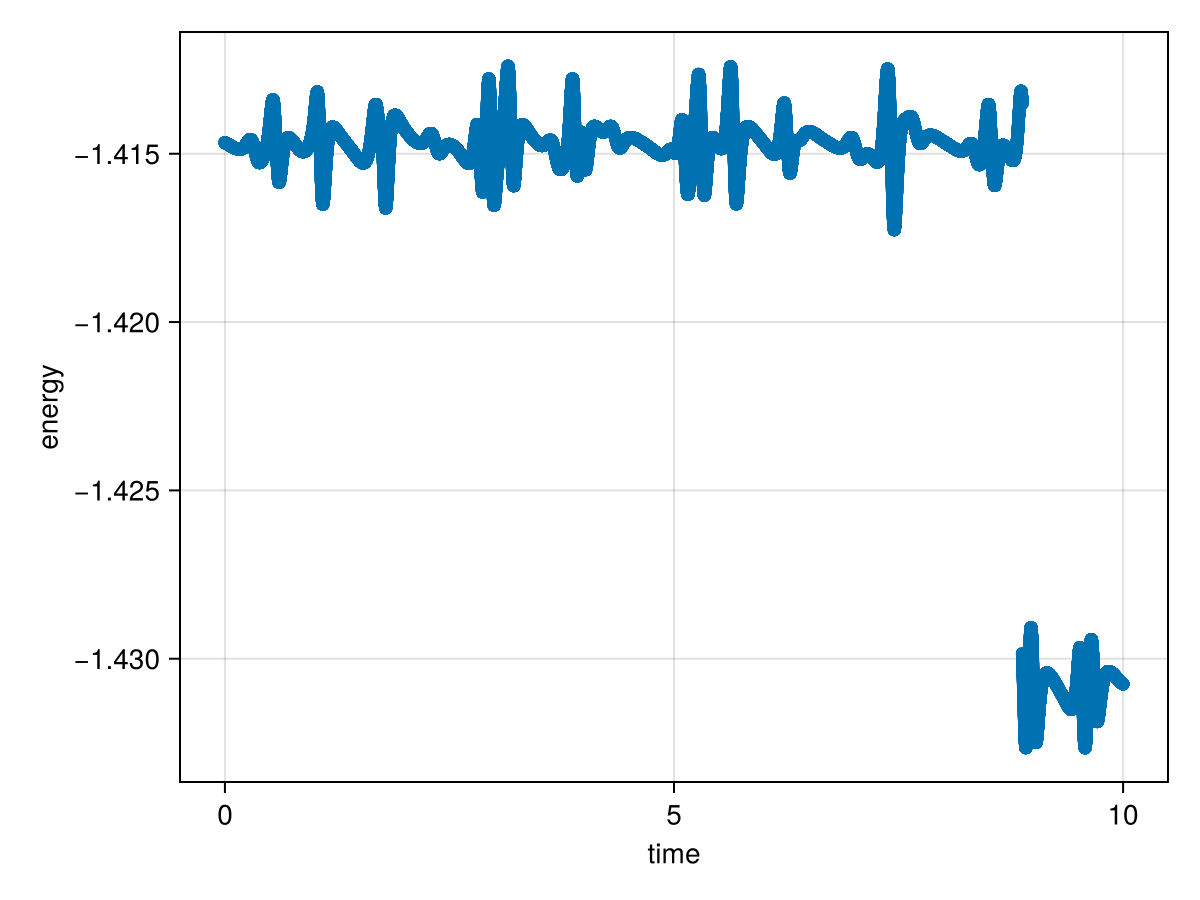

In [6]:
fig = cm.Figure()
ax = cm.Axis(fig[1,1],xlabel="time", ylabel="energy")

cm.plot!(ax, t, energy)


# cm.xlims!(ax, 0, 0.2)
# cm.ylims!(ax, 8000, 8300)


fig